In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [58]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915) 
  
# data (as pandas dataframes) 
X = differentiated_thyroid_cancer_recurrence.data.features 
y = differentiated_thyroid_cancer_recurrence.data.targets 
  



In [59]:
y.value_counts()

Recurred
No          275
Yes         108
Name: count, dtype: int64

In [60]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [61]:

from sklearn.preprocessing import LabelEncoder


# Load the dataset
data = X

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)


In [62]:
data_encoded.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,11,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,18,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,14,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,46,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1


In [63]:
n_clusters = 2  


kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(data_encoded)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


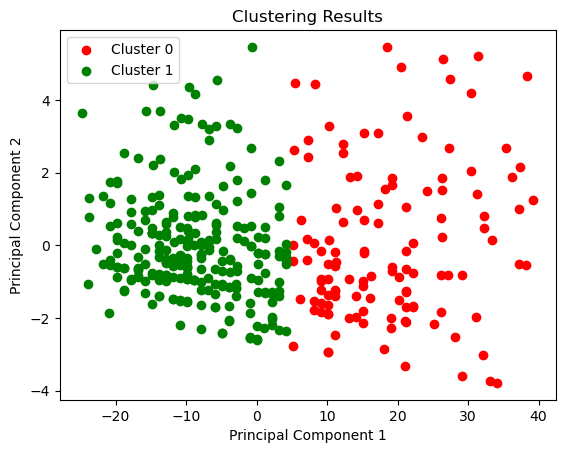

In [69]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_encoded)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to the reduced dataset
principal_df['Cluster'] = cluster_labels

colors = ['red', 'green']  # Adjust colors based on the number of clusters
for cluster in range(2):  # Adjust the range according to the number of clusters
    cluster_df = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_df['PC1'], cluster_df['PC2'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.legend()
plt.show()


In [70]:
# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(data_encoded, cluster_labels)
print("Davies-Bouldin score:", db_score)


Davies-Bouldin score: 0.5634760005173155
